<a href="https://colab.research.google.com/github/Suphattha/KKU_data_mining/blob/master/Final_Exam_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. จากข้อมูล (```w_restaurant.csv```, ```search_click.csv```, ```search_request.csv```) ใน http://qr.tebs.io/6zqwEf สร้าง model เพื่อทำนาย (Classification) ว่าผลการ search เป็นร้านอาหารหรือไม่(```is_food = = True```) โดยพิจารณาจาก 
- วันในสัปดาห์ที่ทำการ search (```Monday-Sunday```) 
- วันในที่ทำการ search (```1-31```)
- เวลาที่ทำการ search (```1-24```)

หมายเหตุที่ 1 สามารถใช้ function ที่ให้มาช่วยในการทำงานได้
1. ```extract_time()``` ซึ่ง input เป็น ```timestamp``` และ output เป็น ```เวลาที่ทำการ search``` ```วันในที่ทำการ search``` ```วันในสัปดาห์ที่ทำการ search```

2. ```is_food``` ซึ่ง input เป็น ```category_name``` และ ```output``` เป็น คำตอบว่า ```เป็นร้านอาหารหรือไม่```

หมายเหตุที่ 2 ควรเตรียมข้อมูลโดยรวมข้อมูลจาก ตาราง ```w_restaurant.csv```, ```search_click.csv```, ```search_request.csv``` ให้ได้ในรูปแบบ ต่อไปนี้
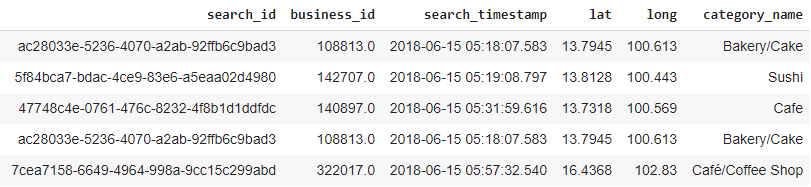

(200 คะแนน)

In [4]:
import pandas

In [5]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/My Drive/DWDM_material'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import os

In [7]:
search_click = os.path.join(path,'search_click.csv')
w_restaurant = os.path.join(path,'w_restaurant.csv')
search_request = os.path.join(path,'search_request.csv')

##Then use pandas to load the data into the environment

In [8]:
w_restaurant_df = pandas.read_csv(w_restaurant)
w_restaurant_df.head()

,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
0,2,นครินทร์ทันตกรรม,2,0,Samut Songkhram,75000,w4rh7g3,0,5.000000,NaN,NaN,1,0,3016,0,0,0,Orthodontic,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
1,4,Corner House,1,0,Bangkok Metropolitan Region,12150,w4rx73h,0,2.000000,NaN,NaN,1,0,321,0,0,1,Quick Meal,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,วัดโลกยสุธาราม,4,0,Phra Nakhon Si Ayutthaya,13000,w4x98jk,0,4.000000,NaN,1.0,0,0,167,0,0,0,Historical/Religion,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,นันท์คาราโอเกะ,1,0,Bangkok Metropolitan Region,10700,w4rqw9q,0,0.000000,NaN,NaN,0,0,901,0,0,0,Karaoke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,Buono Caffe,1,0,Bangkok Metropolitan Region,10220,w4rx4gd,0,3.738462,NaN,15.0,3,0,2360,1,0,2,Café/Coffee Shop,1.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN


In [13]:
search_click_df = pandas.read_csv(search_click)
search_click_df.head()

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads
0,11:38.9,5c004472-5ecc-4159-9698-9f329b8e26e1,298839.0,0,2.222400e+15,True
1,30:51.3,5f34eca0-c04e-4c10-b600-54aa447dbd8e,171372.0,0,4.608380e+14,True
2,32:09.6,8dc6d1f0-11f1-4239-9dd2-5c1674c81224,16157.0,0,2.581490e+15,True
3,00:59.8,1a5810e9-3d1f-44b9-9a2e-26ede21c524b,89741.0,1,1.404580e+15,True
4,23:36.8,6bc75e0d-fc65-471e-9926-ff6be6708639,189564.0,1,9.333590e+14,True


In [15]:
search_click_df.shape

(1048575, 6)

In [16]:
w_restaurant_df.shape

(246847, 32)

##It seem everything is ok, let,s have fun with data
0.Point to data in the table¶

In [18]:
search_click_df['search_id']

0          5c004472-5ecc-4159-9698-9f329b8e26e1
1          5f34eca0-c04e-4c10-b600-54aa447dbd8e
2          8dc6d1f0-11f1-4239-9dd2-5c1674c81224
3          1a5810e9-3d1f-44b9-9a2e-26ede21c524b
4          6bc75e0d-fc65-471e-9926-ff6be6708639
                           ...                 
1048570    99aab616-6fc5-4fbf-994b-4aebee7bb360
1048571    d70a2c5d-ee94-4e4c-9f7c-c5faac6db12a
1048572    4c1de7fe-300e-41aa-9d01-914344fc3753
1048573    2ec0ddec-e450-4b98-9779-42b77aa7eda5
1048574    5741d9cf-b9f1-441d-aa83-d2b0179bf874
Name: search_id, Length: 1048575, dtype: object

In [19]:
search_click_df['search_id'][0]

'5c004472-5ecc-4159-9698-9f329b8e26e1'

In [20]:
w_restaurant_df[['name','city_name','weighted_average_rating']]

,name,city_name,weighted_average_rating
0,นครินทร์ทันตกรรม,Samut Songkhram,5.000000
1,Corner House,Bangkok Metropolitan Region,2.000000
2,วัดโลกยสุธาราม,Phra Nakhon Si Ayutthaya,4.000000
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,0.000000
4,Buono Caffe,Bangkok Metropolitan Region,3.738462
...,...,...,...
246842,Sushi Tama,Bangkok Metropolitan Region,3.663522
246843,สะบายดี คาราโอเกะ,Bangkok Metropolitan Region,0.000000
246844,สเต็กแม่&กาแฟลูก,Bangkok Metropolitan Region,4.000000
246845,Mom Made,Nakhon Si Thammarat,5.000000


In [21]:
search_click_df.iloc[0,1]

'5c004472-5ecc-4159-9698-9f329b8e26e1'

In [22]:
search_click_df.iloc[:10,:2]

,click_timestamp,search_id
0,11:38.9,5c004472-5ecc-4159-9698-9f329b8e26e1
1,30:51.3,5f34eca0-c04e-4c10-b600-54aa447dbd8e
2,32:09.6,8dc6d1f0-11f1-4239-9dd2-5c1674c81224
3,00:59.8,1a5810e9-3d1f-44b9-9a2e-26ede21c524b
4,23:36.8,6bc75e0d-fc65-471e-9926-ff6be6708639
5,48:16.7,92ea02ba-2c89-4efd-973c-e23526c531de
6,39:18.4,79d61918-fb3e-4181-99b6-7a7abddfcdb1
7,33:39.0,7f8b2b57-dea1-4fe1-84c8-5a7d63750e47
8,07:48.3,3d9217bb-3eae-42b5-8cf3-a756efae2cfa
9,41:25.4,a2cb0d41-6e1f-4169-9140-cb671fbb41dc


##Missing Values

In [25]:
search_click_df.isnull()

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1048570,False,False,False,False,False,False
1048571,False,False,False,False,False,False
1048572,False,False,False,False,False,False
1048573,False,False,False,False,False,False


In [26]:
search_click_df.isnull().any()

click_timestamp     False
search_id            True
business_id          True
display_position    False
time_diff_nanos     False
ads                 False
dtype: bool

In [27]:
search_click_df.isnull().any().any()

True

##Handling missing values 1

In [28]:
search_click_df_nm = search_click_df.dropna()

In [29]:
search_click_df_nm.isnull().any().any()

False

In [30]:
print(search_click_df.shape) 
print(search_click_df_nm.shape)

(1048575, 6)
(1048206, 6)


In [31]:
w_restaurant_df.isnull().any()

id                         False
name                       False
domain_id                  False
closed                     False
city_name                  False
zipcode                     True
geohash                    False
new_open                   False
weighted_average_rating    False
number_of_chains            True
number_of_bookmarks         True
number_of_reviews          False
number_of_product_tags     False
total_number_of_views      False
number_of_checkins         False
number_of_menu_groups      False
number_of_menu_photos      False
category_name              False
price_range                 True
avg_price                   True
parking                     True
credit_card_accepted        True
good_for_groups             True
good_for_kids               True
bookable                    True
best_of_wongnai             True
wifi                        True
number_of_seats             True
music_venue                 True
hotel_restaurant            True
pet_friend

In [32]:
w_restaurant_df.dropna(subset=['id','name','price_range']).shape

(180972, 32)

In [33]:
w_restaurant_df[['numder_of_chains']] = w_restaurant_df[['number_of_chains']].fillna(0)

In [34]:
w_restaurant_df.isnull().any()

id                         False
name                       False
domain_id                  False
closed                     False
city_name                  False
zipcode                     True
geohash                    False
new_open                   False
weighted_average_rating    False
number_of_chains            True
number_of_bookmarks         True
number_of_reviews          False
number_of_product_tags     False
total_number_of_views      False
number_of_checkins         False
number_of_menu_groups      False
number_of_menu_photos      False
category_name              False
price_range                 True
avg_price                   True
parking                     True
credit_card_accepted        True
good_for_groups             True
good_for_kids               True
bookable                    True
best_of_wongnai             True
wifi                        True
number_of_seats             True
music_venue                 True
hotel_restaurant            True
pet_friend

In [35]:
w_restaurant_df[['name','city_name','avg_price']]

,name,city_name,avg_price
0,นครินทร์ทันตกรรม,Samut Songkhram,NaN
1,Corner House,Bangkok Metropolitan Region,NaN
2,วัดโลกยสุธาราม,Phra Nakhon Si Ayutthaya,NaN
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,NaN
4,Buono Caffe,Bangkok Metropolitan Region,NaN
...,...,...,...
246842,Sushi Tama,Bangkok Metropolitan Region,NaN
246843,สะบายดี คาราโอเกะ,Bangkok Metropolitan Region,NaN
246844,สเต็กแม่&กาแฟลูก,Bangkok Metropolitan Region,NaN
246845,Mom Made,Nakhon Si Thammarat,NaN


In [60]:
selected_list = new_table['city_name']=='is_food'
selected_list

0         False
1         False
2         False
3         False
4         False
          ...  
246842    False
246843    False
246844    False
246845    False
246846    False
Name: city_name, Length: 246847, dtype: bool

In [61]:
new_table[selected_list].head()

,name,city_name,avg_price


จะใช้คำสั่งให้ข้อมูลในตารางที่เป็น is_food ออกมาเป็น True

In [62]:
import datetime
def extract_time(datetime_s):
    EX_date = datetime.datetime.strptime(datetime_s, "%Y-%m-%d %H:%M:%S.%f")
    return EX_date.hour, EX_date.day, get_day(EX_date.weekday()) 

def get_day(D):
    weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    return weekdays[D] 

def is_food(inp):
    food_list = ['Vegeterian','Sushi','Sukiyaki/Shabu','Street Food/Food Stands','Steak House/Barbeque','Southern Food','Seafood','Ramen','Quick Meal','Pizza','Northern Food','Noodles','Mexican','Korean',
             'Japanese','Italian','Izakaya','Healthy Food','German Food','Fusion Food','French','Food Truck','Fastfood','Dim Sum','Delivery Only','Chinese','Cafe','Café/Coffee Shop','Buffet',
             'Breakfast/Brunch','Bakery/Cake','Barbeque/Grill','American']
    return inp in food_list

##รวมข้อมูลจาก ตาราง w_restaurant.csv, search_click.csv, search_request.csv

In [94]:
file_path = os.path.join(path,'w_restaurant.csv, search_click.csv, search_request.csv')
print(file_path)

/content/drive/My Drive/DWDM_material/w_restaurant.csv, search_click.csv, search_request.csv


In [96]:
import os
import pandas as pd
base_path = '/content/drive/My Drive/DWDM_material'
data = pd.read_csv(os.path.join(base_path,'w_restaurant.csv, search_click.csv, search_request.csv'))
data.head()

FileNotFoundError: ignored

In [92]:
print(w_restaurant.csv, search_click.csv, search_request.csv)

AttributeError: ignored

แสดงไฟล์ข้อมูลที่รวมกันแล้ว

2. จากข้อมูล (```reduced_marketbasket.csv```) ใน http://qr.tebs.io/6zqwEf ให้เปรียบเทียบ รูปแบบ การซื้อที่น่าสนใจเป็นราย Transaction ของประชากรใน ประเทศ ```United Kingdom``` กับ ประเทศอื่นๆ (```'Country'!='United Kingdom'```)

(80 คะแนน)

In [77]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/DWDM_material'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
import os
data = pd.read_csv(os.path.join (path,'reduced_marketbasket.csv'),encoding='latin1')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France


In [84]:
data.groupby('Country').sum().sort_values('Quantity')

,Quantity,UnitPrice,CustomerID
Country,,,
Saudi Arabia,75,2.411000e+01,1.256500e+05
Bahrain,260,8.657000e+01,2.100270e+05
RSA,352,2.481000e+02,7.218680e+05
Brazil,356,1.426000e+02,4.086080e+05
Lebanon,386,2.424400e+02,5.743800e+05
European Community,497,2.940500e+02,9.215880e+05
Czech Republic,592,8.815000e+01,3.834300e+05
Lithuania,652,9.944000e+01,5.366200e+05
Malta,944,6.660100e+02,2.158496e+06


In [81]:
transacs = data.groupby('InvoiceNo')['StockCode'].apply(list)
transacs

InvoiceNo
536365     [85123A, 71053, 84406B, 84029G, 84029E, 22752,...
536366                                        [22633, 22632]
536367     [84879, 22745, 22748, 22749, 22310, 84969, 226...
536368                          [22960, 22913, 22912, 22914]
536369                                               [21756]
                                 ...                        
C581484                                              [23843]
C581490                                       [22178, 23144]
C581499                                                  [M]
C581568                                              [21258]
C581569                                       [84978, 20979]
Name: StockCode, Length: 25900, dtype: object

In [85]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-cp36-none-any.whl size=5975 sha256=236302e16108fe6da6adc5de3e8d1e7c820b0fcdad992df63cb0eabd947f67a7
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


In [86]:
from apyori import apriori

In [88]:
list(apriori(transacs,min_support=0.022,min_confidence=0.1))

[RelationRecord(items=frozenset({'20725', '20727'}), support=0.025019305019305018, ordered_statistics=[OrderedStatistic(items_base=frozenset({'20725'}), items_add=frozenset({'20727'}), confidence=0.40298507462686567, lift=8.059701492537313), OrderedStatistic(items_base=frozenset({'20727'}), items_add=frozenset({'20725'}), confidence=0.5003861003861003, lift=8.059701492537313)]),
 RelationRecord(items=frozenset({'20725', '22383'}), support=0.0255984555984556, ordered_statistics=[OrderedStatistic(items_base=frozenset({'20725'}), items_add=frozenset({'22383'}), confidence=0.41231343283582095, lift=8.176813101414826), OrderedStatistic(items_base=frozenset({'22383'}), items_add=frozenset({'20725'}), confidence=0.5076569678407351, lift=8.176813101414826)]),
 RelationRecord(items=frozenset({'22384', '20725'}), support=0.023667953667953667, ordered_statistics=[OrderedStatistic(items_base=frozenset({'20725'}), items_add=frozenset({'22384'}), confidence=0.3812189054726368, lift=8.895107794361525

In [97]:
'Country'!='United Kingdom'

True

3. เขียนคำศัพท์ที่ได้เรียนในวิชาพร้อมทั้งคำนิยามที่เป็นคำพูดของนักศึกษาเอง (ห้าม search google) 20 คำ

(คำละ 0.5 คะแนน)

path คือ คำสั่งจัดเก็บไฟล์ข้อมูล


index คือ เป็นค่าใน list

cocat คือ เอามารวมกัน

if คือ เงื่อนไขในการเขียนโค้ด

len คือ ความยาว

append คือ เป็นการเพิ่มสมาชิกไปเรื่อยๆ


Test คือ เป็นการทดสอบหรือการทำนาย


Draw คือ การขยายเพื่อดูข้อมูลอย่างละเอียด สามารถดูวัน ชั่วโมงได้

Drew คือ การซูมข้อมูลให้อยู่ในรูปแบบกว้าง เช่น รายเดือน รายปี

 Evaluate คือ การนำไป Test มาวัดผลว่าดีแค่ไหน

Train (fit) คือ การสร้างโมเดล

Import Define คือ นิยามโมเดล

import คือ การเรียกใช้ package

print คือ คำสั่งเพื่อให้แสดงที่จัดเก็บไฟล์ข้อมูล


table1 คือ คำสั่งเพื่อให้แสดงรายละเอียดข้อมูลที่อยู่ในไฟล์

mod คือ % การหารเอาเศษ


matplotlib คือ คำสั่งแสดงขอมูลในไฟล์แบบย่อ

Loop คือ เซตของสมาชิกในลูป

function max() คือ ฟังก์ชั่นการหาค่าที่มากที่สุดใน list

fanction sort() คือ ฟังก์ชั่นการเรียงลำดับจากค่ามากที่สุดไปค่าที่น้อยที่สุดใน list

Graphs and Networks คือ เครือข่ายสังคมและข้อมูล โครงสร้างโมเดล